        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Spring 2022</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [ ]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [206]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [207]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\rxp1674\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [208]:
print("Shape of X-train:{}".format(X_train.shape))
print("Shape of X-test:{}".format(X_test.shape))
#The dataset consists of 60000 images in the training set and 10000 images in the test set

Shape of X-train:(60000, 28, 28)
Shape of X-test:(10000, 28, 28)


As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

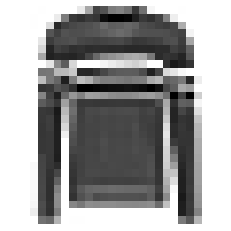

In [209]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[5]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [210]:
y_train[5]

2

The above code shows that the image belongs to category 2. To get the associated label with each category, you can use the following code:

In [211]:
#list of the image categories of the dataset stored in a variable class_names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[5]])

Pullover


Now, it's your turn,

**Explore the processed data**

Let's look at an image to see what it looks like

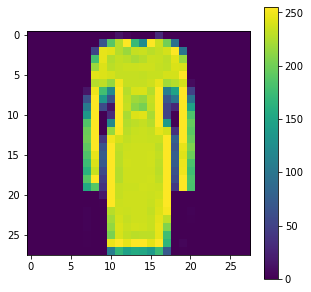

In [212]:
random_image = X_train[2500] #looking at one random image from the train set 

plt.figure(figsize=(5,5))
plt.imshow(random_image)
plt.colorbar()
plt.show()

Displaying 25 random images from the training set and verifying the data is in correct format

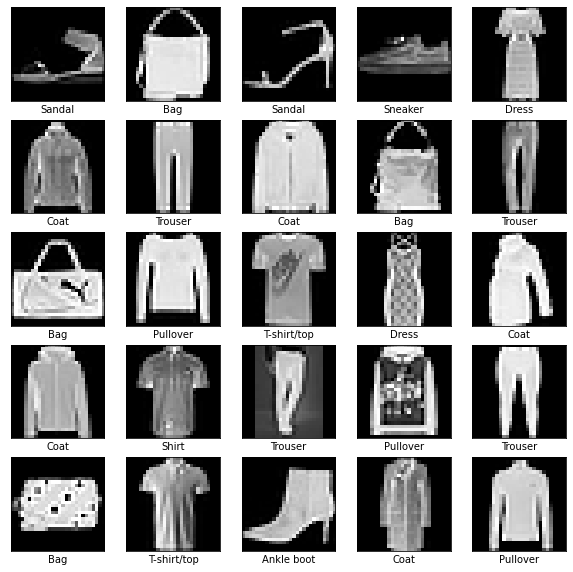

In [78]:
import random
plt.figure(figsize=(10,10))
for i in range(25):
    index = random.randint(0, len(X_train)+1)
    image = X_train[index]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[y_train[index]])
    
plt.show()


The value of each pixel in the dataset is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So, here we convert the integers to float type and normalize it.

**Normalizing the data**

In [79]:
#Normalizing training set
X_train = tf.cast(X_train, tf.float32)
X_train /= 255.0
X_train.shape

TensorShape([60000, 28, 28])

In [80]:
#Normalizing testing set
X_test = tf.cast(X_test, tf.float32)
X_test /= 255.0
X_test.shape

TensorShape([10000, 28, 28])

**Reshaping the data**

In [81]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

X_train = X_train.reshape(60000, 28*28)
print(X_train.shape)

X_test = X_test.reshape(10000, 28*28)
print(X_test.shape)

(60000, 784)
(10000, 784)


<font size="4">**1. Logistic Regression**</font>

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

In [91]:
logreg_model = LogisticRegression(solver='liblinear')
accuracy_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for Logistic Regression: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Logistic Regression: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Logistic Regression: [0.85241667 0.84725    0.8565     0.85633333 0.85166667]
Mean Accuracy Score for Logistic Regression: 0.8528333333333334



In [96]:
#Using stratifiedKfold to distribute the data evenly between classes
#Using 5 folds
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

scores = {'precision': make_scorer(precision_score, average='micro'),
           'recall': make_scorer(recall_score, average='micro'),
           'f1': make_scorer(f1_score, average='weighted')}

#Cross Validation Scores
CVscores = cross_validate(logreg_model,  X_train, y_train, scoring=scoring, cv=cv, return_train_score=False)
print(CVscores)

{'fit_time': array([82.29379296, 81.92150664, 81.34134102, 82.39109182, 83.38979578]), 'score_time': array([0.03124213, 0.04792881, 0.03121829, 0.02992296, 0.03121758]), 'test_precision': array([0.85316667, 0.85158333, 0.85675   , 0.85366667, 0.84958333]), 'test_recall': array([0.85316667, 0.85158333, 0.85675   , 0.85366667, 0.84958333]), 'test_f1': array([0.85196333, 0.8497064 , 0.85500658, 0.85260042, 0.84817525])}


In [99]:
#Calculating metrics
print("Mean Precision Score for Logistic Regression: {}".format(np.mean(CVscores['test_precision'])))
print()
print("Mean Recall Score for Logistic Regression: {}".format(np.mean(CVscores['test_recall'])))
print()
print("Mean F-1 Score for Logistic Regression: {}".format(np.mean(CVscores['test_f1'])))
print()

Mean Precision Score for Logistic Regression: 0.8529500000000001

Mean Recall Score for Logistic Regression: 0.8529500000000001

Mean F-1 Score for Logistic Regression: 0.8514903963041291



In [100]:
logreg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [106]:
#Building Confusion Matrix
y_test_hat = logreg_model.predict(X_test)
logreg_cm = metrics.confusion_matrix(y_test,y_test_hat)
print("Confusion matrix:\n\n", logreg_cm)
print()

#Classification Report
print("Classification Report for Log Reg:\n")
print(metrics.classification_report(y_test, y_test_hat)) 

Confusion matrix:

 [[819   5  14  50   7   4  89   0  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 732  11 133   0  83   1   9   0]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  40 761   0  72   0   9   0]
 [  2   0   0   1   0 915   0  52  10  20]
 [147   3 128  47 108   0 539   0  28   0]
 [  0   0   0   0   0  32   0 937   1  30]
 [  7   1   6  11   3   7  15   4 946   0]
 [  0   1   0   1   0  13   1  41   0 943]]

Classification Report for Log Reg:

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.73      0.73      1000
           3       0.82      0.87      0.84      1000
           4       0.72      0.76      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.64      0.54      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.93  

In [214]:
#F1-score is higher for class labels 1, 5, 7, 8 & 9
print("F1-score is higher for {}, {}, {}, {},{}".format(class_names[1],class_names[5],class_names[7], class_names[8],class_names[9]))

F1-score is higher for Trouser, Sandal, Sneaker, Bag,Ankle boot


<font size="3">**Accuracy of Logistic Regression is 85%**</font>

In [114]:
#Further calculating AUC score to measure the performance of the model
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test,logreg_model.predict_proba(X_test), multi_class="ovr", average="macro")
print("AUC score is:{:.3f}\n".format(logreg_auc))

AUC score is:0.981



In [ ]:
#AUC score says predictions are 98% correct

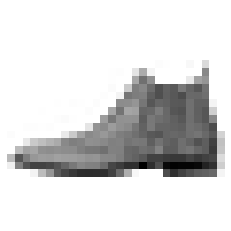

The above image belongs to the class name: Ankle boot


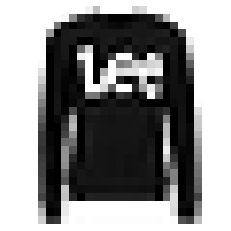

The above image belongs to the class name: Pullover


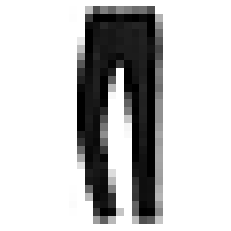

The above image belongs to the class name: Trouser


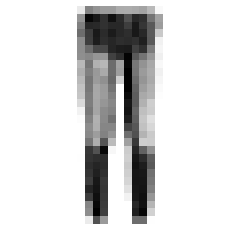

The above image belongs to the class name: Trouser


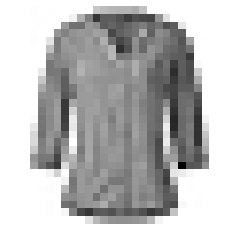

The above image belongs to the class name: Shirt


In [215]:
#Validating the model on existing test dataset
#Testing with 5 images

i=0
for i in range(5):
    img1 = X_test[i]
    re_img1 = img1.reshape(28,28)
    plt.imshow(re_img1,cmap='binary')
    plt.axis('off')
    plt.show()
    predicted_value1 = y_test_hat[i]
    print("The above image belongs to the class name: {}".format(class_names[predicted_value1]))
    i = i+1

In [ ]:
#The above five test images are predicted correctly

<font size="4">**2. Decision Tree**</font>

In [112]:
#Next considering Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

DT_model = DecisionTreeClassifier()
param_grid = {'max_depth': [10,20,30,40,50]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

#Using grid search CV to identify the best parameter
grid = GridSearchCV(DT_model, param_grid, cv = cv, scoring = 'accuracy')
grid.fit(X_train, y_train)
print("The Best Parameter for Decision Tree is: {}".format(grid.best_params_))

The Best Parameter for Decision Tree is: {'max_depth': 10}


In [115]:
#Max depth is 10 from the Grid Search

DT_model1 = DecisionTreeClassifier(max_depth=10, criterion='gini')
DT_model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [120]:
#Building DT model and calculating metrics
y_pred_tree = DT_model1.predict(X_test)
Tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted") #f1_score
Tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree) #accuracy_score
Tree_cm = metrics.confusion_matrix(y_test, y_pred_tree) #confusion_matrix   
print("F1 score is: {}\n".format(Tree_f1))
print("Accuracy score is: {}\n".format(Tree_accuracy))
print("Confusion matrix is: \n\n", Tree_cm)
print()

#Classification Report
print("Classification Report for Decision Tree:\n")
print(metrics.classification_report(y_test, y_pred_tree))

F1 score is: 0.8023876078916156

Accuracy score is: 0.8017

Confusion matrix is: 

 [[777   3  26  40  12   0 130   1   8   3]
 [ 12 924   4  41   7   0  11   0   0   1]
 [ 13   0 665   8 243   0  61   0   9   1]
 [ 35  11  26 811  62   0  49   0   5   1]
 [  3   0 126  39 733   0  96   0   3   0]
 [  2   2   0   1   0 875   0  65  21  34]
 [137   3 162  37 141   3 499   0  14   4]
 [  0   0   0   0   0  30   0 926   5  39]
 [  6   3  17   9  20   8  28   9 898   2]
 [  1   0   1   0   0  18   1  67   3 909]]

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1000
           1       0.98      0.92      0.95      1000
           2       0.65      0.67      0.66      1000
           3       0.82      0.81      0.82      1000
           4       0.60      0.73      0.66      1000
           5       0.94      0.88      0.90      1000
           6       0.57      0.50      0.53      1000
         

In [121]:
#F1-score is higher for class labels 1, 7, 8 & 9
print("F1-score is higher for {}, {}, {}, {}".format(class_names[1],class_names[7], class_names[8],class_names[9]))

F1-score is higher for Trouser, Sneaker, Bag, Ankle boot


<font size="3">**Accuracy of the Decision Tree is 80%**</font>

In [122]:
#Further using cross validation score to measure the performance of the model

from sklearn.model_selection import cross_val_score
DT_accuracy = cross_val_score(DT_model1, X_train, y_train, cv=3, scoring="accuracy")
print("Mean Accuracy Score for Decision Tree: {}\n".format(np.mean(DT_accuracy)))
print()

Mean Accuracy Score for Decision Tree: 0.8052666666666667




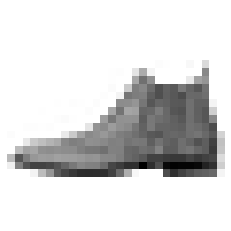

The above image belongs to the class name: Ankle boot


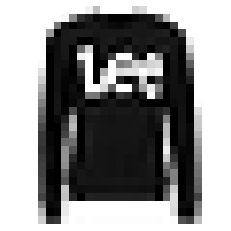

The above image belongs to the class name: Pullover


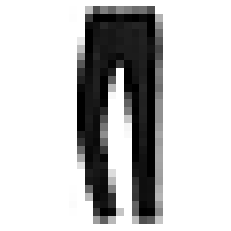

The above image belongs to the class name: Trouser


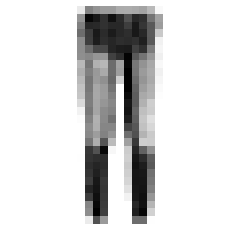

The above image belongs to the class name: Trouser


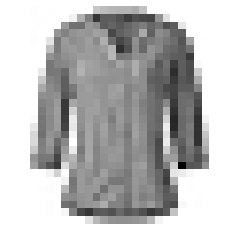

The above image belongs to the class name: Shirt


In [131]:
#Validating the model on existing test dataset
#Testing with 5 images
i=0
for i in range(5):     
    img1 =X_test[i]
    re_img1 =img1.reshape(28,28)
    plt.imshow(re_img1,cmap='binary')
    plt.axis('off')
    plt.show()
    predicted_value2 = y_pred_tree[i]
    print("The above image belongs to the class name: {}".format(class_names[predicted_value2]))
    i=i+1

In [ ]:
#the above five test images are predicted correctly, need to check out-of-sample accuracy later

<font size="4">**3. KNN**</font>

In [132]:
#Building KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [134]:
#Calculating the metrics
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)

print("F1 score: {}\n".format(knn_f1))
print("Accuracy score: {}\n".format(knn_accuracy))
print("Confusion matrix: \n\n", knn_cm)
print()

##Classification Report
print("Classification Report for KNN:\n")
print(metrics.classification_report(y_test, y_pred_knn))

F1 score: 0.8546439722018904

Accuracy score: 0.8554

Confusion matrix: 

 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88     

In [136]:
#F1-score is higher for class labels 1, 5, 7, 8 & 9
print("F1-score is higher for {}, {}, {}, {},{}".format(class_names[1],class_names[5],class_names[7], class_names[8], class_names[9]))

F1-score is higher for Trouser, Sandal, Sneaker, Bag,Ankle boot


<font size="3">**Accuracy of KNN Model is 85%**</font>

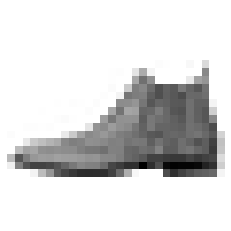

The above image belongs to the class name: Ankle boot


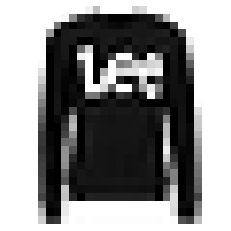

The above image belongs to the class name: Pullover


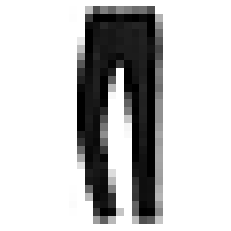

The above image belongs to the class name: Trouser


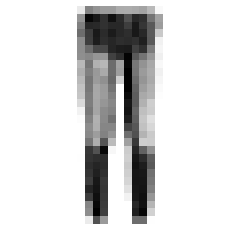

The above image belongs to the class name: Trouser


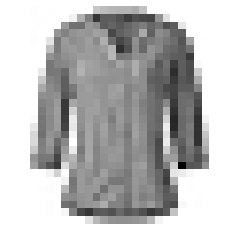

The above image belongs to the class name: Shirt


In [137]:
#Validating the model on existing test dataset
#Testing with 5 images

i=1
for i in range(5):
    img1 = X_test[i]
    re_img1=img1.reshape(28,28)
    plt.imshow(re_img1,cmap='binary')
    plt.axis('off')
    plt.show()
    predicted_value3 =y_pred_knn[i]
    print("The above image belongs to the class name: {}".format(class_names[predicted_value3]))
    i=i+1

In [ ]:
#the above five test images are predicted correctly
#So far, all the three models have predicted properly using test data

<font size="4">**Now, testing the models with my own images**</font>

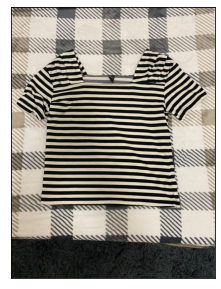

(1024, 768, 3)


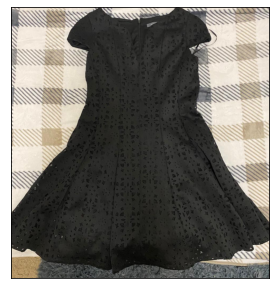

(1024, 974, 3)


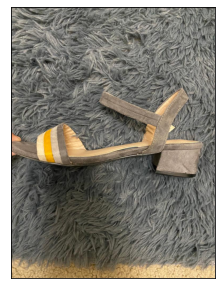

(1024, 768, 3)


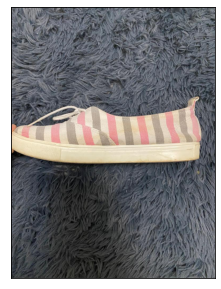

(1024, 768, 3)


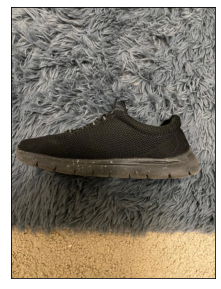

(1024, 768, 3)


In [165]:
#Task2

import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

#Reading five images taken
Shirt=np.array(mpimg.imread("Shirt.jpeg"))
Dress=np.array(mpimg.imread("Dress.jpeg"))
Sandal=np.array(mpimg.imread("Sandal.jpeg"))
Sneaker=np.array(mpimg.imread("Sneaker.jpeg"))
blackshoes=np.array(mpimg.imread("blackshoes.jpeg"))

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Shirt)
ax.set(xticks=[], yticks=[])
plt.show()
print(Shirt.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Dress)
ax.set(xticks=[], yticks=[])
plt.show()
print(Dress.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Sandal)
ax.set(xticks=[], yticks=[])
plt.show()
print(Sandal.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Sneaker)
ax.set(xticks=[], yticks=[])
plt.show()
print(Sneaker.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(blackshoes)
ax.set(xticks=[], yticks=[])
plt.show()
print(blackshoes.shape)

In [149]:
#pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [166]:
from PIL import Image
import glob

image_ls=[] #creating image list
resized_ls=[] #creating resized image list       

for each in glob.glob("*.jpeg"):
    Img=Image.open(each)
    image_ls.append(Img) #appending all the images to image list
    
print(image_ls)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x2570DD73BE0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=974x1024 at 0x2570DD73910>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x257169952B0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x2571689B160>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x2570DD6DBE0>]


In [169]:
for image in image_ls:
    image.show()
    image=image.resize((28,28))
    resized_ls.append(image) #appending all the resized images to resized image list
    
print(resized_ls)

[<PIL.Image.Image image mode=RGB size=28x28 at 0x257169AA370>, <PIL.Image.Image image mode=RGB size=28x28 at 0x257169AA9A0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x25716221CA0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2570DD6D550>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2570DD6D430>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2570E12E220>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2570DD6D8E0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2570DD6DB80>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2571678D820>, <PIL.Image.Image image mode=RGB size=28x28 at 0x25712345A00>]


In [174]:
for (i, j) in enumerate (resized_ls):
    j.save('{}{}{}'.format('./image',i+1,'.jpeg')) #renaming the resized images and storing them in one single file

In [176]:
#Reading the images
image1=np.array(mpimg.imread("image1.jpeg"))
image2=np.array(mpimg.imread("image2.jpeg"))
image3=np.array(mpimg.imread("image3.jpeg"))
image4=np.array(mpimg.imread("image4.jpeg"))
image5=np.array(mpimg.imread("image5.jpeg"))

**Converting images to gray scale images**

In [179]:
from skimage import color
from skimage import io

grayimage1 = color.rgb2gray(io.imread('image1.jpeg'))
grayimage2 = color.rgb2gray(io.imread('image2.jpeg'))
grayimage3 = color.rgb2gray(io.imread('image3.jpeg'))
grayimage4 = color.rgb2gray(io.imread('image4.jpeg'))
grayimage5 = color.rgb2gray(io.imread('image5.jpeg'))

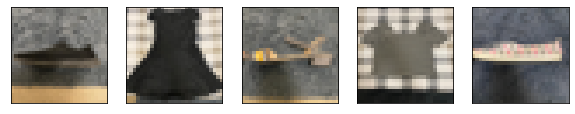

In [180]:
fig, ax = plt.subplots(1,5,figsize=(10,10))
for i, j in enumerate(ax.flat):
    j.imshow(resized_ls[i], cmap='binary')
    j.set(xticks=[],yticks=[])

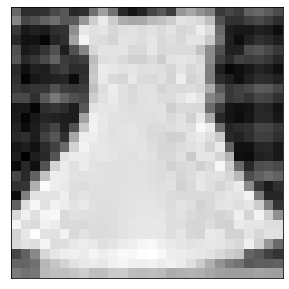

(28, 28)

In [182]:
#verifying the shape of one image
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(grayimage2, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()
grayimage2.shape

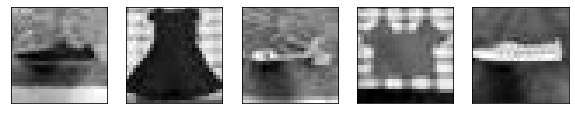

In [185]:
#creating one list to store all five gray images to pass through the models
grayimages=[] #empty list
grayimages.append(grayimage1)
grayimages.append(grayimage2)
grayimages.append(grayimage3)
grayimages.append(grayimage4)
grayimages.append(grayimage5)

fig, ax=plt.subplots(1,5,figsize=(10,10))
for i, j in enumerate(ax.flat):
    j.imshow(grayimages[i], cmap='gray')
    j.set(xticks=[],yticks=[])

In [187]:
grayimage_array = np.array(grayimages) #converting the list to array

grayimage_array.shape

(5, 28, 28)

In [192]:
columns = grayimage_array[1].shape[0] * grayimage_array[1].shape[1] #reshaping the array size from 3D to 2D to flatten the image
print(columns) 

784


In [194]:
print(grayimage_array[2].shape) #verifying the shape of one gray image after reshaping the array

(28, 28)


In [195]:
#Normalizing the array to have uniform values

grayimage_array = tf.cast(grayimage_array, tf.float32)
grayimage_array /= 255.0
grayimage_array.shape

TensorShape([5, 28, 28])

In [196]:
#from tensorflow.python.ops.numpy_ops import np_config
#np_config.enable_numpy_behavior()

grayimage_array = grayimage_array.reshape(5, 28*28)
print(grayimage_array.shape)

(5, 784)


[5 5 5 5 5]


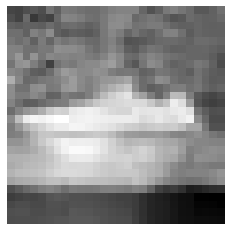

The above image belongs to the class name: Sandal


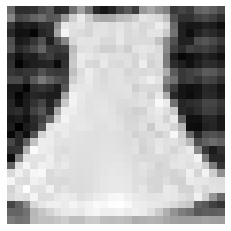

The above image belongs to the class name: Sandal


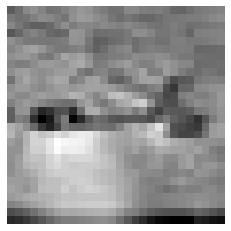

The above image belongs to the class name: Sandal


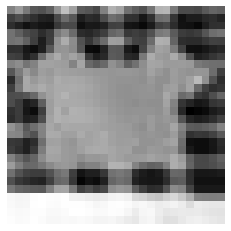

The above image belongs to the class name: Sandal


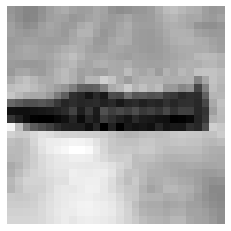

The above image belongs to the class name: Sandal


In [199]:
#Passing the gray images array to Logistic Regression to validate the model

Logreg_prediction = logreg_model.predict(grayimage_array)
print(Logreg_prediction)

i=0
for i in range(5):
    gimage1 = grayimage_array[i]
    re_gimage1 = gimage1.reshape(28,28)
    plt.imshow(re_gimage1,cmap='binary')
    plt.axis('off')
    plt.show()
    pred_val_log = Logreg_prediction[i] #predicted value
    print("The above image belongs to the class name: {}".format(class_names[pred_val_log]))
    i=i+1

[6 6 6 6 6]


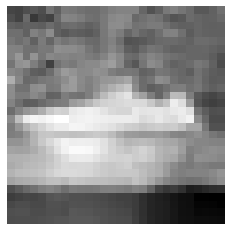

The above image belongs to the class name: Sandal


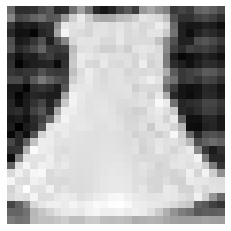

The above image belongs to the class name: Sandal


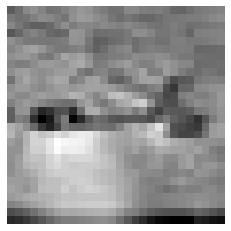

The above image belongs to the class name: Sandal


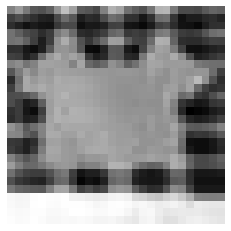

The above image belongs to the class name: Sandal


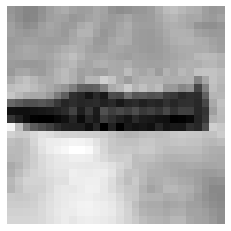

The above image belongs to the class name: Sandal


In [200]:
#Passing the array to KNN
knn_prediction = knn_model.predict(grayimage_array)
print(knn_prediction)

i=0
for i in range(5):
    gimage2 = grayimage_array[i]
    re_gimage2 = gimage2.reshape(28,28)
    plt.imshow(re_gimage2,cmap='binary')
    plt.axis('off')
    plt.show()
    pred_val_knn = Logreg_prediction[i]
    print("The above image belongs to the class name: {}".format(class_names[pred_val_knn]))
    i=i+1

[5 5 5 5 5]


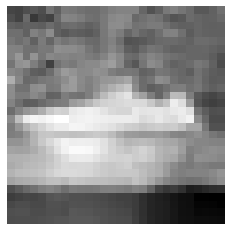

The above image belongs to the class name: Sandal


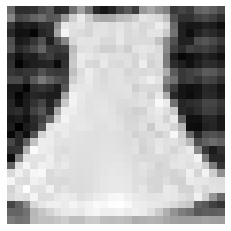

The above image belongs to the class name: Sandal


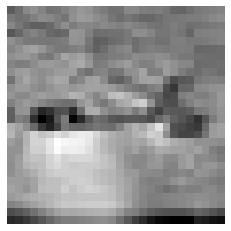

The above image belongs to the class name: Sandal


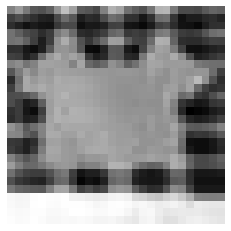

The above image belongs to the class name: Sandal


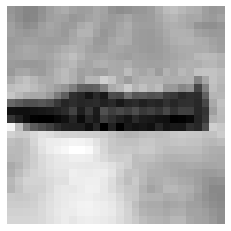

The above image belongs to the class name: Sandal


In [202]:
#Passing the array to Decision Tree
DT_prediction = DT_model1.predict(grayimage_array)
print(DT_prediction)

i=0
for i in range(5):
    gimage3 = grayimage_array[i]
    re_gimage3 = gimage3.reshape(28,28)
    plt.imshow(re_gimage3,cmap='binary')
    plt.axis('off')
    plt.show()
    pred_val_DT = DT_prediction[i]
    print("The above image belongs to the class name: {}".format(class_names[pred_val_DT]))
    i=i+1

<font size="3">**I've used three supervised learning models for this project:**</font>

<font size="3">**1. Logistic Regression**</font>

<font size="3">**2. Decision Tree**</font>

<font size="3">**3. KNN**</font>

<font size="3">**Findings:**</font>

<font size="3">**1. In-sample accuracy was higher for all of the three with Logistic Regression & KNN performing better than Decision Trees.**</font>

<font size="3">**2. However, out-of sample accuracy was very low. This means the models were not learning properly and are predicting the average value for each image**</font>

<font size="3">**3. To overcome this, the training dataset must have been run multiple times.**</font>

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Apr 5 2022 at 7:00 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>